## Introduction
Linear regression is one of the most important algorithms under the supervised learning category in Machine Learning. It is also the commonly used model for predictive analysis. This project using this machine learning method to explore the personal health dataset and predict treatment and insurance costs.

## Model Implementation
### 1. Import Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# Read the data
df=pd.read_csv("insurance.csv")

# Browse the sample data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Preprocessing the data

In [5]:
# Check for overall data information include the data types & nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# double check the NULL
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Calculating some statistical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Getting the data columns
df.describe().columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [13]:
# Separating numerical and categorical data
df_num = df[['age','bmi','children','charges']]
df_cat = df[['sex','smoker','region']]

In [14]:
# Use one hot enconding to converting the categorical data into numeric data
df1 = pd.get_dummies(df_cat)
df1

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,False,True,True,False,False,True,False,False
1334,True,False,True,False,True,False,False,False
1335,True,False,True,False,False,False,True,False
1336,True,False,True,False,False,False,False,True


In [15]:
# Concatenating the encoded categorical and numerical data to form the dataset.
data = pd.concat([df_num,df1], axis=1)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


### 3. Exploratory Data Analysis

In [16]:
# The correlation between the features
data.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


<Axes: >

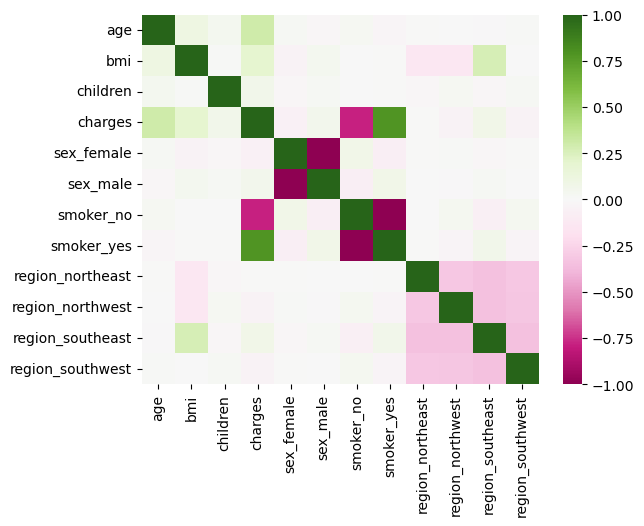

In [18]:
# Heatmap to visualize the correlation
sns.heatmap(data.corr(), cmap='PiYG')

From this heatmap we find the following observations:

1. Strong correlation between charges and smoker_yes.
2. Weak correlation between charges and age.
2. Weak correlation between charges and bmi. 
3. Weak correlation between bmi and region_southeast.

Since the values for the weak correlations are less than 0.5 so we term them as insignificant and drop them

In [19]:
# Correlation between charges and the other features.
data.corr()['charges'].sort_values()

smoker_no          -0.787251
sex_female         -0.057292
region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

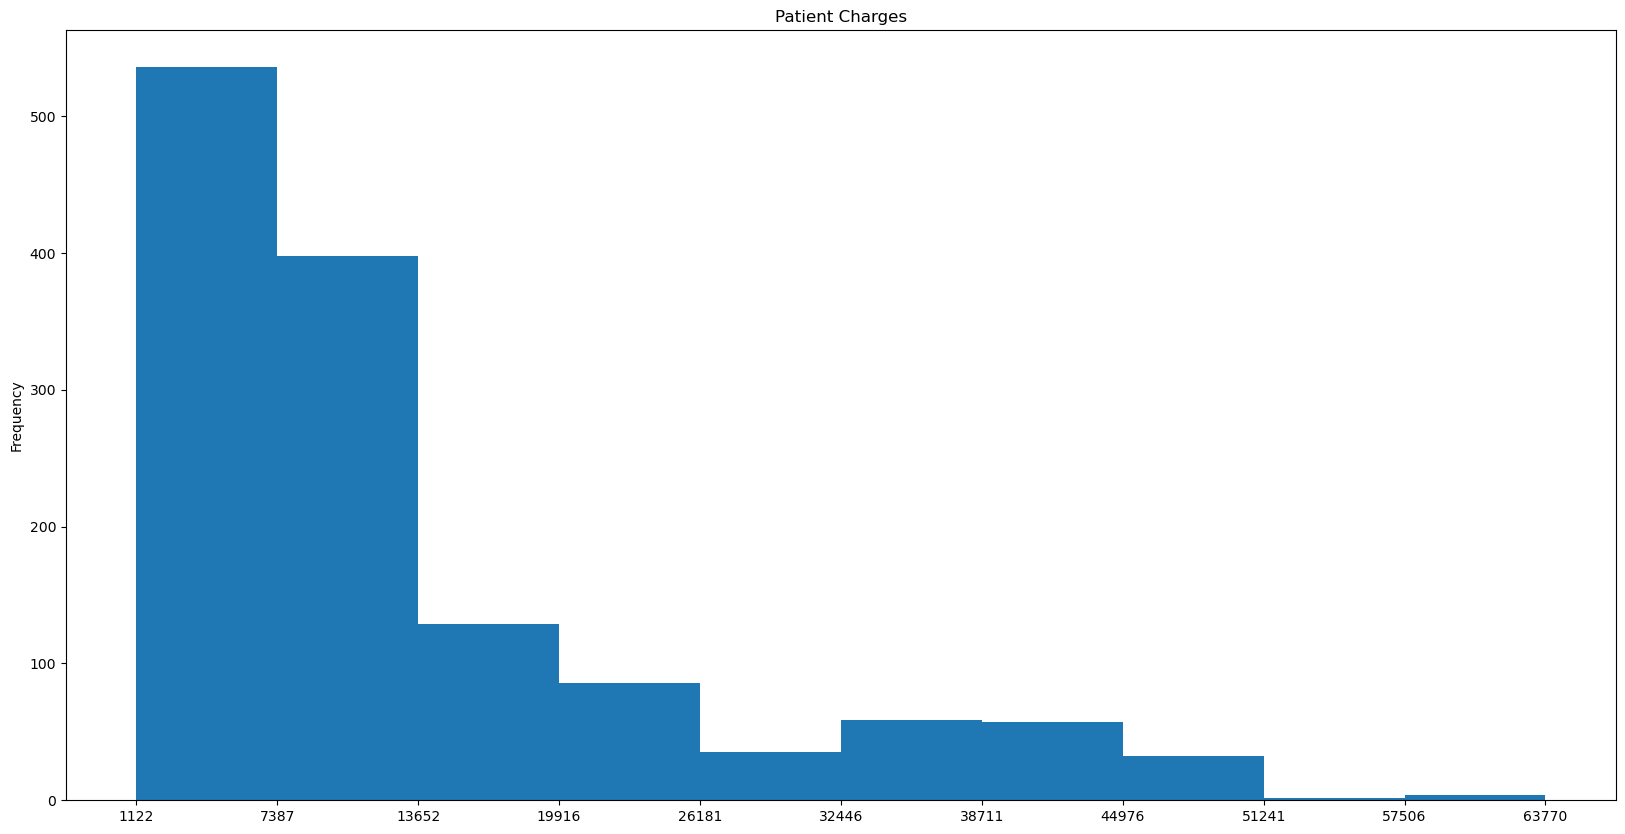

In [24]:
# Graph showing the min and maximum charges
count, bin_edges = np.histogram(data['charges'])
data['charges'].plot(kind='hist', xticks=bin_edges, figsize=(20,10))
plt.title("Patient Charges")
plt.show()

### 4. Model Building

Use sklearn package to predict the charges with the help of the other features.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 5. Model fitting
For this model, we split the dataset into training and test set. We use 30% of the dataset for testing (test_size=0.3) and then take the dataset without the charges column as the predictor variables and the charges as response/target variable.

In [32]:
x = data.drop(['charges'], axis = 1)
y = data['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

### 6. Model prediction

In [28]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7909160991789905


Looks like the basic linear regression model predicting the cost of treatment look good and the score value is 0.79.

## Model Evaluation

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
print('MSE for train data is:' , mean_squared_error(y_train,y_train_pred))
print('MSE for test data is:' , mean_squared_error(y_test,y_test_pred))

print('R2 for train data:', r2_score(y_train,y_train_pred))
print('R2 for test data:' , r2_score(y_test,y_test_pred))

MSE for train data is: 37931360.958770044
MSE for test data is: 33342497.826954577
R2 for train data: 0.7309569871174701
R2 for test data: 0.7909160991789905


We can see that the closely matching results between training and test data and the R-squared for test data means that the accuracy of our model is around 80% on the test data.This is enough to conclude our model is appropriate to predict patient charges based on their personal health data.

## References
1. Miri Choi, Medical Cost Personal Datasets (2013), Kaggle
